# Homework 11
*Author: Wenhui Zeng*

In [88]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from patsy import dmatrices
import sklearn
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns # data 

In [89]:
import os
print("My working director:\n" + os.getcwd())
os.chdir(r"/Users/wenhuizeng/Library/Mobile Documents/com~apple~CloudDocs/high performance/week 11/hw11")
print("My working director:\n" + os.getcwd())
## Enable multiple outputs from jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#matplotlib.rcParams['figure.figsize'] = [10.0,6.0]

My working director:
/Users/wenhuizeng/Library/Mobile Documents/com~apple~CloudDocs/high performance/week 11/hw11
My working director:
/Users/wenhuizeng/Library/Mobile Documents/com~apple~CloudDocs/high performance/week 11/hw11


In [90]:
df = pd.read_csv("wdbc.data",header=None)
df2 = pd.read_csv("data.csv")

In [91]:
#df2 = df2.iloc[:,:-1]
list = ['Unnamed: 32']
df2 = df2.drop(list,axis = 1 )
df2.shape
df2.head()

(569, 32)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
df.columns=df2.columns
df.head()
df.shape

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 32)

# Summarize the Dataset

In [93]:
df.groupby('diagnosis').mean()
df.columns

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Visualization
total is 30 features, they are ten features mean, se and worst. 

Number of Benign:  357
Number of Malignant :  212


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

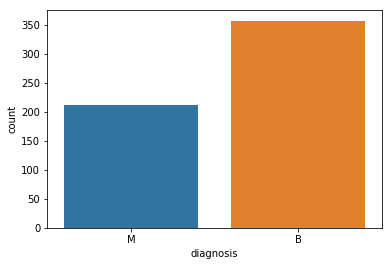

In [94]:
y = df['diagnosis']
ax = sns.countplot(y,label="Count")      
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
df.columns

In [95]:
y = df[['diagnosis']]
data = df.drop(['id','diagnosis'],axis=1)
data_std = (data - data.mean()) / (data.std())  
data_std.head()

#df_long=pd.melt(df,id_vars=['diagnosis','id'],var_name='feature',value_name='value')
#df_long.head()
#df_wide = df_long.pivot_table(index=['id','diagnosis'],columns='feature',values='value')
#pivot can only index one column
#df_wide = df_wide.reset_index()
#df_wide.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


,diagnosis,features,value
0,M,texture_se,-0.564768
1,M,texture_se,-0.875473
2,M,texture_se,-0.779398
3,M,texture_se,-0.110312
4,M,texture_se,-0.789549


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

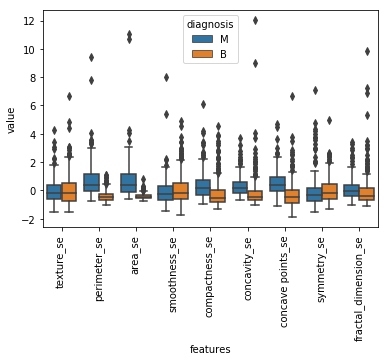

In [96]:
df1 = pd.concat([y,data_std.iloc[:,11:20]],axis=1)
df1_long = pd.melt(df1,id_vars=['diagnosis'],var_name="features",value_name='value')
df1_long.head()
sns.boxplot(x="features", y="value", hue="diagnosis", data=df1_long)
plt.xticks(rotation=90)

,diagnosis,feature,value
0,M,texture_se,-0.564768
1,M,texture_se,-0.875473
2,M,texture_se,-0.779398
3,M,texture_se,-0.110312
4,M,texture_se,-0.789549


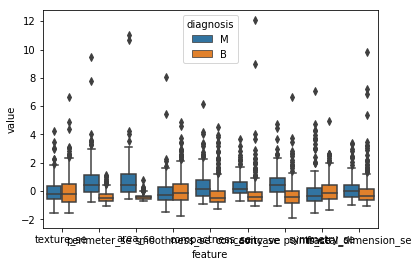

In [97]:
df2= pd.concat([y,data_std.iloc[:,11:20]],axis=1)
df2_long = pd.melt(df2,id_vars=['diagnosis'],var_name='feature',value_name='value')
df2_long.head()
sns.boxplot(data=df2_long,hue='diagnosis',x='feature',y='value')

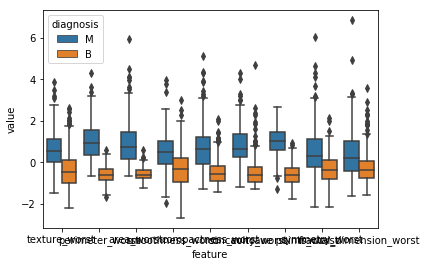

In [98]:
df3 = pd.concat([y,data_std.iloc[:,21:]],axis=1)
df3_long = pd.melt(df3,id_vars='diagnosis',var_name='feature',value_name='value')
sns.boxplot(data=df3_long,x='feature',y='value',hue='diagnosis')

# Create the matrix

# Question: The variable name can't have space in reading variable name? How to we solve this in an efficient way?

In [133]:
df['cancer'] = np.where(df['diagnosis']=='B',0,1)
df['concave_points_se']=df['concave points_se']
df['concave_points_worst'] =  df['concave points_worst']
df['concave_points_mean'] = df['concave points_mean']


remove_list = ['diagnosis','id','cancer','concave points_se','concave points_worst','concave points_mean']

var_names= set(df.columns)-set(remove_list)

formula = 'cancer ~ ' + '+'.join(var_names)

df['cancer'].mean()
formula

0.37258347978910367

'cancer ~ concavity_se+concavity_mean+texture_worst+symmetry_se+texture_se+fractal_dimension_worst+radius_worst+smoothness_worst+area_worst+texture_mean+smoothness_mean+concavity_worst+concave_points_mean+perimeter_worst+perimeter_se+symmetry_worst+radius_mean+concave_points_worst+perimeter_mean+area_mean+fractal_dimension_mean+compactness_worst+symmetry_mean+smoothness_se+area_se+fractal_dimension_se+compactness_se+radius_se+compactness_mean+concave_points_se'

In [134]:
Y,X = dmatrices(formula,df)

In [135]:
Y.shape

(569, 1)

In [137]:
X.shape

(569, 31)

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,np.ravel(Y),test_size=0.25,random_state=25)

## Null Model

In [146]:
df['cancer'].mean()

0.37258347978910367

In [166]:
from sklearn.dummy import DummyClassifier
null_model = DummyClassifier(strategy='most_frequent',
                      random_state=0)
null_model.fit(x_train,y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [174]:
model_result = {}
model_result['Null']=(sklearn.metrics.accuracy_score(y_train,null_model.predict(x_train)),\
                     sklearn.metrics.accuracy_score(y_test,null_model.predict(x_test)))
def get_result(x):
        print("\n{0:20}   {1:4}    {2:4}".format('Model','Train','Test'))
        print('-------------------------------------------')
        for i in x.keys():
            print("{0:20}   {1:<6.4}   {2:<6.4}".format(i,x[i][0],x[i][1]))
    
get_result(model_result)


Model                  Train    Test
-------------------------------------------
Null                   0.6197   0.6503


## Logistic Regression no regularization

It seems like the sklearn is automatically use l2 with C=1 as the regularization. If you want to turn off the regularization, set C to infinite. C is the inverse of lambda, if C is infinite, lambda is 0. It is logistic regression.


In [172]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression(penalty='l2',C=1e42,solver='liblinear',fit_intercept=True)
logistic.fit(x_train,y_train)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [175]:
model_result['logistic']=(sklearn.metrics.accuracy_score(y_train,logistic.predict(x_train)),\
                     sklearn.metrics.accuracy_score(y_test,logistic.predict(x_test)))
def get_result(x):
        print("\n{0:20}   {1:4}    {2:4}".format('Model','Train','Test'))
        print('-------------------------------------------')
        for i in x.keys():
            print("{0:20}   {1:<6.4}   {2:<6.4}".format(i,x[i][0],x[i][1]))
    
get_result(model_result)


Model                  Train    Test
-------------------------------------------
Null                   0.6197   0.6503
logistic               0.9836   0.9231


## There is overfit in the logistic regression without regularization

# Logistic Regression with L1

# The lambda (C) is the hyperparameter and need to tuning.

In [186]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
## set our transformation
scaler = preprocessing.StandardScaler()

## Select the alpha through cross validation (k-folds leave one out)
# auto generate 20 values between 1e-4 and 1e4 on log scale
logistic_l1 = linear_model.LogisticRegressionCV(cv=5,
                                        Cs=20, ## takes awhile to fit 20 models!
                                        penalty='l1',
                                        solver='liblinear') 


pipe1 = Pipeline([("scale", scaler),
                  ("LASSO", logistic_l1)])
pipe1.fit(x_train,y_train)
pipe1.named_steps['LASSO'].C_

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LASSO', LogisticRegressionCV(Cs=20, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l1',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0))])

array([1.62377674])

In [180]:
model_result['logistic_l1_auto']=(sklearn.metrics.accuracy_score(y_train,pipe1.predict(x_train)),\
                     sklearn.metrics.accuracy_score(y_test,pipe1.predict(x_test)))
    
get_result(model_result)


Model                  Train    Test
-------------------------------------------
Null                   0.6197   0.6503
logistic               0.9836   0.9231
logistic_l1_auto       0.9883   0.972 


## The overfitting problems is mitigated. So the overfitting problems works 
# Logistic Regression L2

In [190]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
## set our transformation
scaler = preprocessing.StandardScaler()

## Select the alpha through cross validation (k-folds leave one out)
# auto generate 20 values between 1e-4 and 1e4 on log scale
logistic_l2 = linear_model.LogisticRegressionCV(cv=5,
                                        Cs=20, ## takes awhile to fit 20 models!
                                        penalty='l2',
                                        solver='lbfgs') 


pipe2 = Pipeline([("scale", scaler),
                  ("Ridge", logistic_l2)])
pipe2.fit(x_train,y_train)
pipe2.named_steps['Ridge'].C_

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Ridge', LogisticRegressionCV(Cs=20, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0))])

array([4.2813324])

In [191]:
model_result['logistic_l2_auto']=(sklearn.metrics.accuracy_score(y_train,pipe2.predict(x_train)),\
                     sklearn.metrics.accuracy_score(y_test,pipe2.predict(x_test)))   
get_result(model_result)


Model                  Train    Test
-------------------------------------------
Null                   0.6197   0.6503
logistic               0.9836   0.9231
logistic_l1_auto       0.9883   0.972 
logistic_l2_auto       0.993    0.972 


## Elastic net penalty, standardize the inputs first 

In [215]:
scaler = preprocessing.StandardScaler()

## Select the alpha through cross validation (k-folds leave one out)
# auto generate 20 values between 1e-4 and 1e4 on log scale
logistic_enet = linear_model.ElasticNetCV(cv=5, random_state=0)
scaler = preprocessing.StandardScaler()
pipe3 = Pipeline([("scale", scaler),
                  ("ElasticNetCV", logistic_enet)])
pipe3.fit(x_train,y_train)
pipe3.named_steps['ElasticNetCV'].alpha_

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ElasticNetCV', ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0))])

0.0021944110944089427

In [206]:
#model_result['ElasticNetCV']=(sklearn.metrics.accuracy_score(y_train,pipe3.predict(x_train)),\
#                     sklearn.metrics.accuracy_score(y_test,pipe3.predict(x_test)))   
#get_result(model_result)

# Elasitic Net only return the prediction probability, we need to set the thresholds to give 0 or 1
# Random Forest 
## Hyperparameter:
max_features: number of possible features to select from.  
n_estimater: number of trees
max_depth: the depth level of tree


In [216]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':(50,100,200,300),
              'max_features':(5,10,15,20)}
## specify model without hyperparameters
rf_model = ensemble.RandomForestClassifier(random_state=32)
## specify search with model
rf_gs = GridSearchCV(rf_model,
                   parameters,
                   cv=5,
                   return_train_score=True)

scaler = preprocessing.StandardScaler()
pipe4 = Pipeline([("scale", scaler),
                  ("Random Forest", rf_gs )])
pipe4.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Random Forest', GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nod...     pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0))])

In [214]:
## add model score
## Score the Model on Training and Testing Set
model_result['RandomForest_CV'] = \
            (sklearn.metrics.accuracy_score(y_train,pipe4.predict(x_train)),
             sklearn.metrics.accuracy_score(y_test,pipe4.predict(x_test)))
get_result(model_result)


Model                  Train    Test
-------------------------------------------
Null                   0.6197   0.6503
logistic               0.9836   0.9231
logistic_l1_auto       0.9883   0.972 
logistic_l2_auto       0.993    0.972 
RandomForest_CV        1.0      0.951 


In [220]:
parameters2 = {'max_depth':(2,5,7,10,20)}
rf_model_2 = ensemble.RandomForestClassifier(random_state=32)
rf_gs_2 = GridSearchCV(rf_model_2,parameters2,cv=5,return_train_score=True)
scaler = preprocessing.StandardScaler()
pipe5 = Pipeline([('scale',scaler),
                 ('Random_Forest_CV2',rf_gs_2)])
pipe5.fit(x_train,y_train)
model_result['RandomForest_CV2'] = \
            (sklearn.metrics.accuracy_score(y_train,pipe5.predict(x_train)),
             sklearn.metrics.accuracy_score(y_test,pipe5.predict(x_test)))
get_result(model_result)

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/skl

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Random_Forest_CV2', GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf...     pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0))])


Model                  Train    Test
-------------------------------------------
Null                   0.6197   0.6503
logistic               0.9836   0.9231
logistic_l1_auto       0.9883   0.972 
logistic_l2_auto       0.993    0.972 
RandomForest_CV        1.0      0.951 
RandomForest_CV2       1.0      0.9371


## Random Forest is overfitting. The model performace is not as good as lasso or ridge

# Gradient tree boosting: Classification 

# Learning rate is the hyperparameter


In [223]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(x_test,y_test)))
    print()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Learning rate:  0.05
Accuracy score (training): 0.962
Accuracy score (validation): 0.951



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Learning rate:  0.1
Accuracy score (training): 0.981
Accuracy score (validation): 0.944



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Learning rate:  0.25
Accuracy score (training): 0.998
Accuracy score (validation): 0.944



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.951



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.75, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.937



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.951



## Learning Rate 0.05 is good since others gives high variance

In [226]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.05, max_features=2, max_depth = 2, random_state = 0)
scaler = preprocessing.StandardScaler()
pipe6 = Pipeline([('scale',scaler),
                 ('gb',gb)])
pipe6.fit(x_train,y_train)
model_result['Gradient Boosting'] = \
            (sklearn.metrics.accuracy_score(y_train,pipe6.predict(x_train)),
             sklearn.metrics.accuracy_score(y_test,pipe6.predict(x_test)))
get_result(model_result)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gb', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0....    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])


Model                  Train    Test
-------------------------------------------
Null                   0.6197   0.6503
logistic               0.9836   0.9231
logistic_l1_auto       0.9883   0.972 
logistic_l2_auto       0.993    0.972 
RandomForest_CV        1.0      0.951 
RandomForest_CV2       1.0      0.9371
Gradient Boosting      0.9624   0.951 
